In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')
df = df.merge(region_df,on='NOC', how='left')

In [3]:
years = df['Year'].unique().tolist()
years.sort()
years.insert(0,'Overall')

In [4]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1994,
 1996,
 1998,
 2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016]

In [5]:
country = np.unique(df['region'].dropna().values).tolist()
country.sort()
country.insert(0,'Overall')

In [6]:
# determine no. of events in olympics
df['Event'].unique().shape[0] 

765

In [7]:
df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index()

,Year,count
0,2016,204
1,2012,203
2,2008,202
3,2004,200
4,2000,199
5,1996,196
6,1992,169
7,1988,157
8,1984,146
9,1972,120


<Axes: xlabel='Year', ylabel='Sport'>

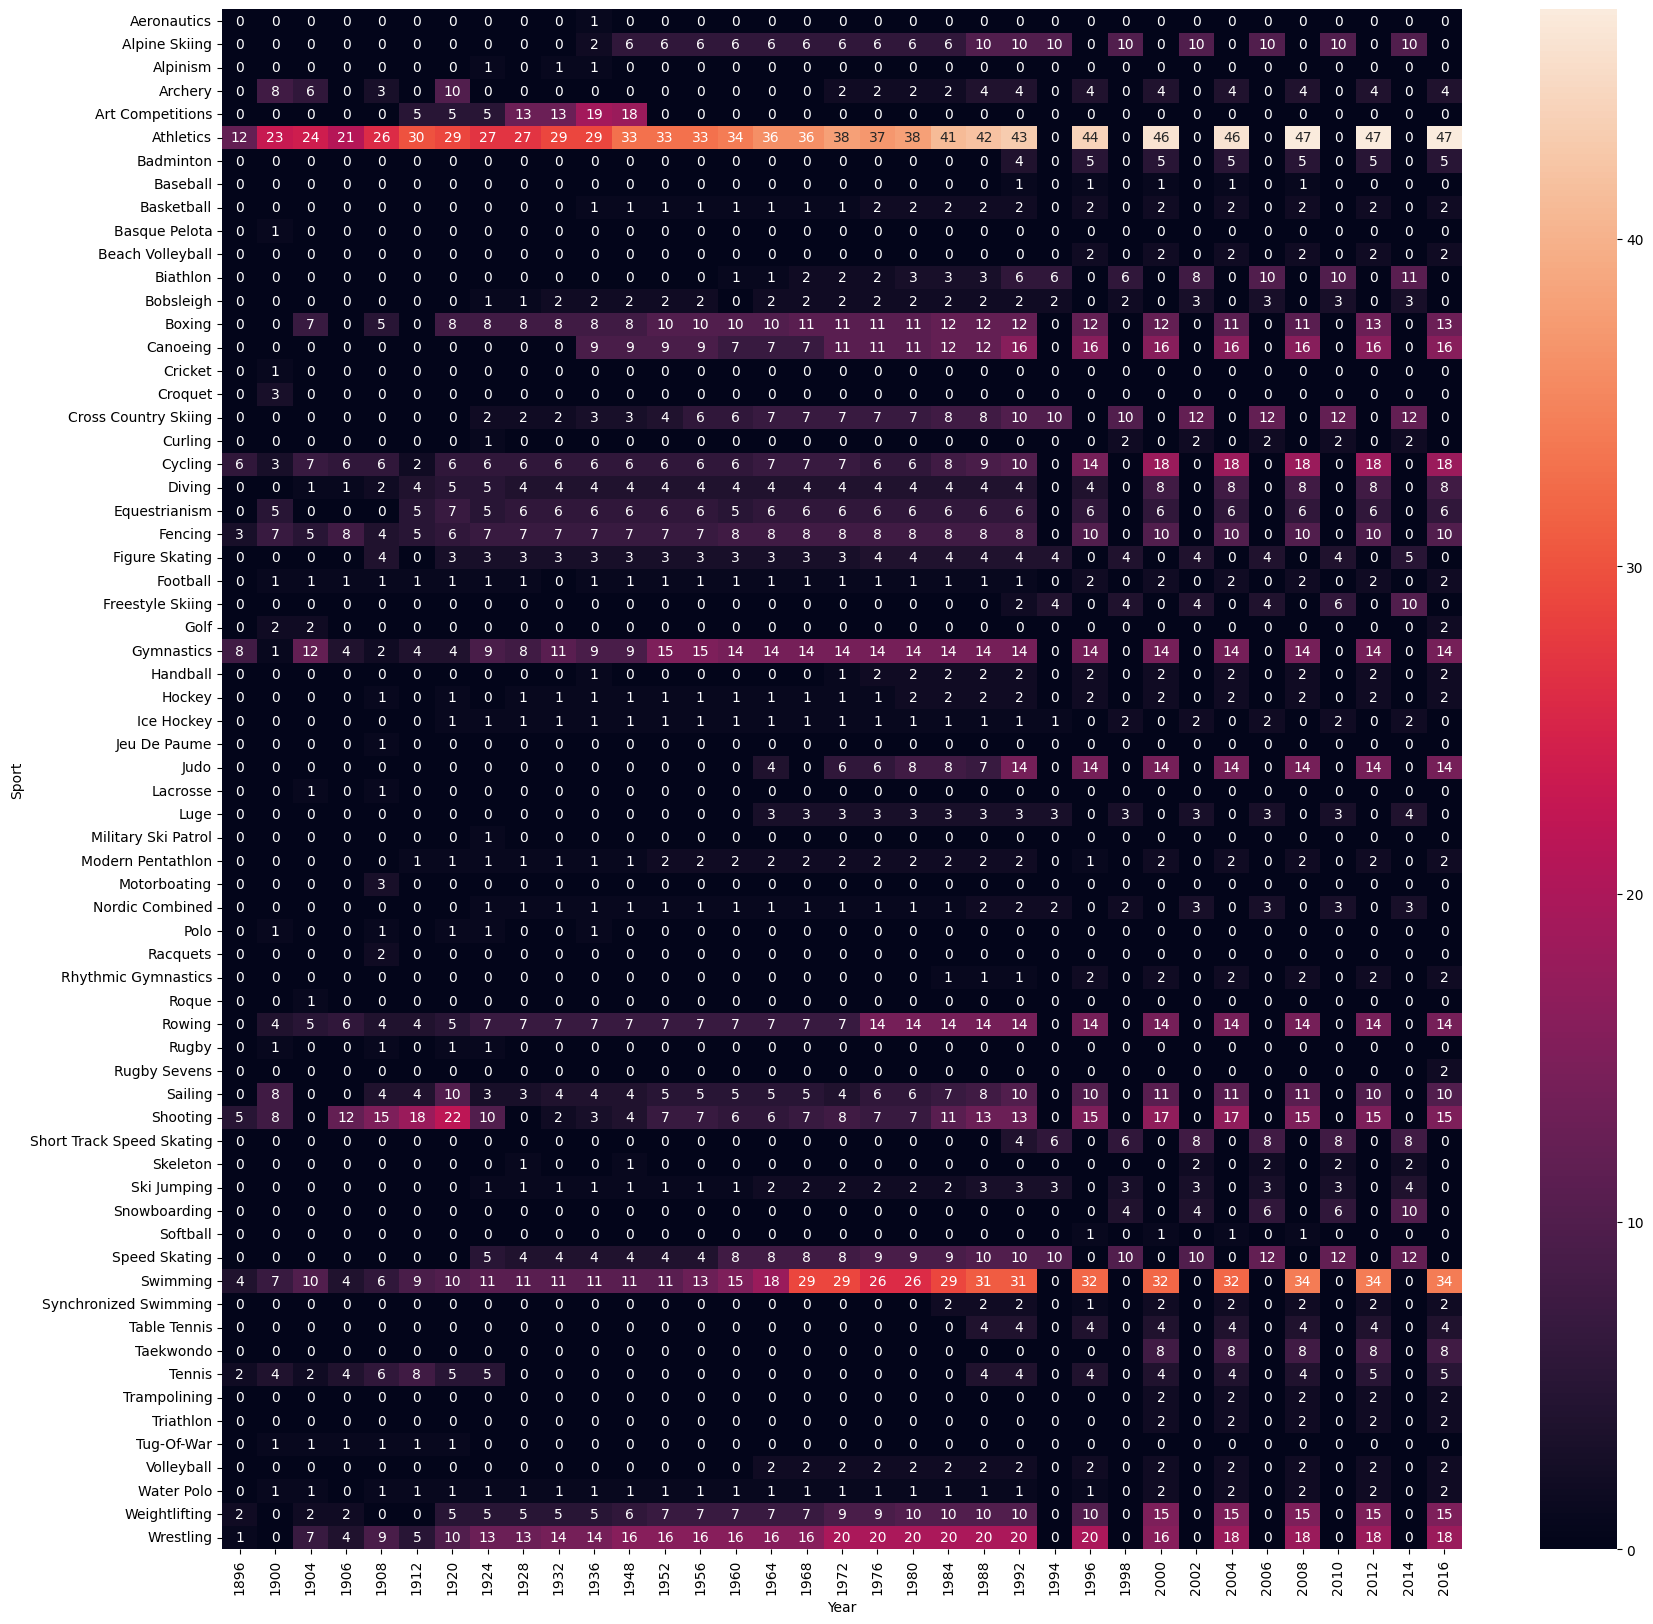

In [8]:
x = df.drop_duplicates(['Year','Sport','Event'])
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype(int),annot=True)


In [9]:
def most_successful(df,sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]
    
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='Name',how='left')[['Name','count','Sport','region']].drop_duplicates('Name')
    x.rename(columns={'count':'Medals'},inplace=True)
    return x

In [10]:
most_successful(df,'Gymnastics')

,Name,Medals,Sport,region
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
19,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
43,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
67,Takashi Ono,13,Gymnastics,Japan
100,Sawao Kato,12,Gymnastics,Japan
124,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
145,Viktor Ivanovych Chukarin,11,Gymnastics,Russia
161,Vra slavsk (-Odloilov),11,Gymnastics,Czech Republic
179,Vitaly Venediktovich Shcherbo,10,Gymnastics,Russia
195,Polina Hryhorivna Astakhova,10,Gymnastics,Russia


### Country Wise

In [11]:
temp_df =  df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

/tmp/ipykernel_4820/530182857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)


In [12]:
new_df = temp_df[temp_df['region'] == 'USA']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()
final_df

,Year,Medal
0,1896,19
1,1900,54
2,1904,231
3,1906,23
4,1908,46
5,1912,63
6,1920,95
7,1924,103
8,1928,62
9,1932,122


In [13]:
fig = px.line(final_df, x="Year", y="Medal")
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

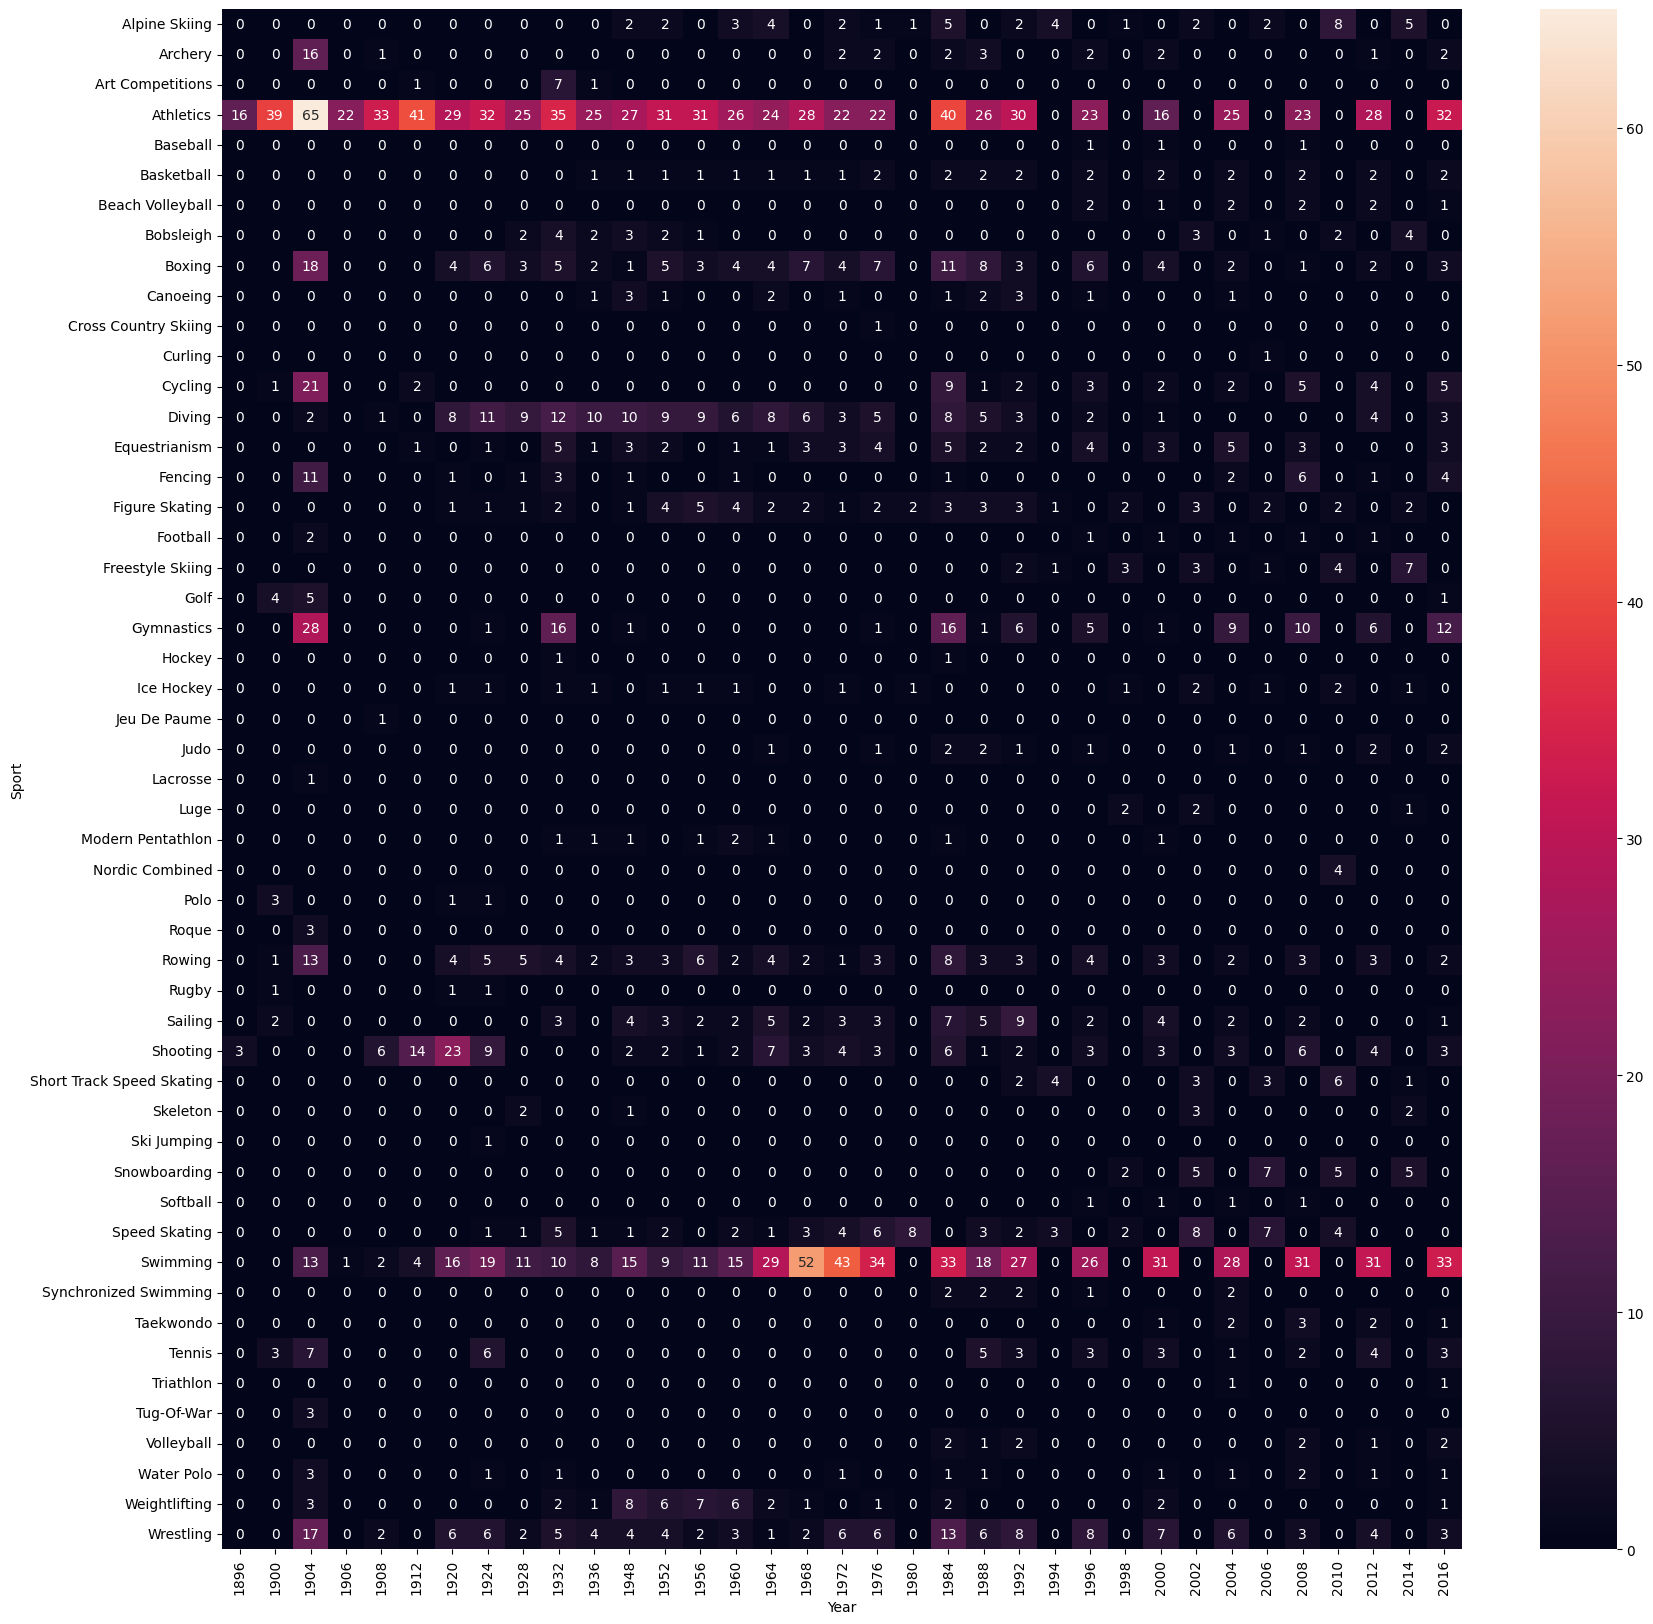

In [14]:
new_df = temp_df[temp_df['region'] == 'USA']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal', aggfunc='count').fillna(0),annot=True)

In [15]:
def most_successful(df,country):
    temp_df = df.dropna(subset=['Medal'])

    
    temp_df = temp_df[temp_df['region'] == country]
    
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='Name',how='left')[['Name','count','Sport']].drop_duplicates('Name')
    x.rename(columns={'count':'Medals'},inplace=True)
    return x

In [16]:
most_successful(df,'Pakistan')

,Name,Medals,Sport
0,Manzoor Hussain Atif,3,Hockey
4,Saeed Anwar,3,Hockey
7,Anwar Ahmed Khan,3,Hockey
10,Abdul Hamid,3,Hockey
15,Muhammad Asad Malik,3,Hockey
18,Motiullah Khan,3,Hockey
21,Abdul Rashid,3,Athletics
27,Salim Sherwani,3,Hockey
30,Mudassar Asghar Saeed,2,Hockey
32,Noor Alam,2,Hockey


In [17]:
import plotly.figure_factory as ff

In [18]:
athlete_df = df.drop_duplicates(subset=['Name','region'])

In [19]:
x1  = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [20]:
fig = ff.create_distplot([x1, x2, x3, x4],['Overall Age', 'Gold Medalist','Silver Medalist', 'Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

In [28]:
x= []
name = []
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-of-War', 'Athletics', 'Swimming', 'Badminton', 'Sailing', 'Gymnastics', 'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling', 'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Golf', 'Softball', 'Archery', 'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball', 'Rhythmic Gymnastics', 'Rugby Sevens', 'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice hockey']

for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    ages = temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna().tolist()
    if len(ages)>0:
        x.append(ages)
        name.append(sport)

fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)
fig.show()

<Axes: xlabel='Weight', ylabel='Height'>

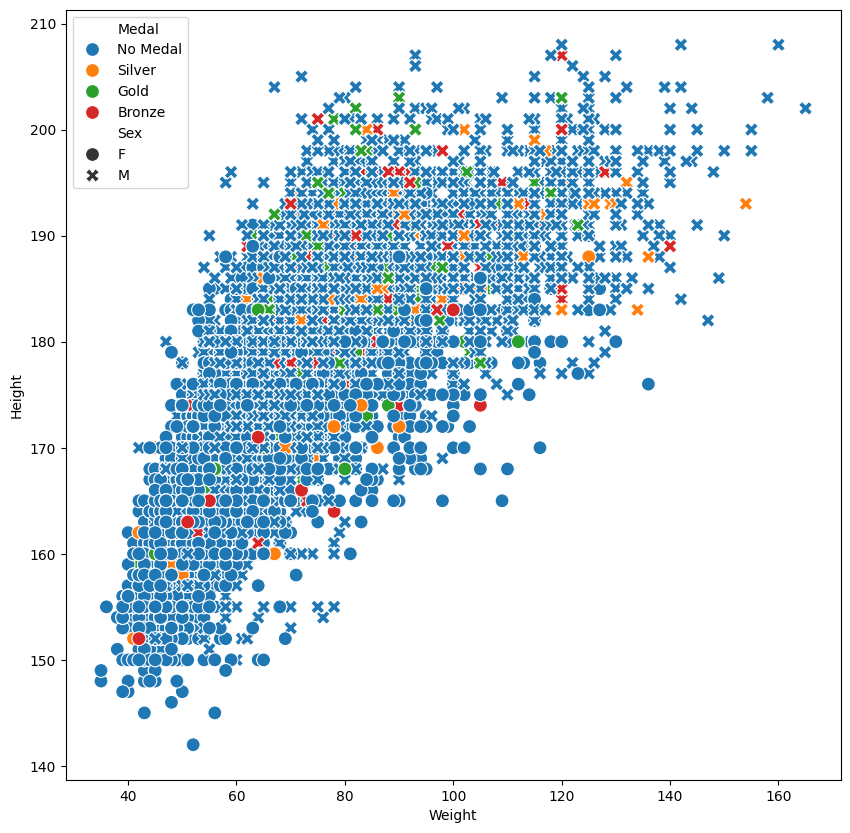

In [36]:
athlete_df['Medal'].fillna('No Medal', inplace=True)
plt.figure(figsize=(10,10))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(data=temp_df, x=temp_df['Weight'], y=temp_df['Height'], hue=temp_df['Medal'],style=temp_df['Sex'],s=100)

In [40]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

final = men.merge(women,on='Year', how='left')
final.rename(columns={'Name_x':'Male', 'Name_y':'Female'},inplace=True)

final.fillna(0,inplace=True)

final

fig = px.line(final, x='Year', y=["Male", "Female"])
fig.show()